## Amiyah Stukes Project 1

Importing libraries

In [ ]:
# this is for displaying plots with high resolution
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [15]:
import warnings #ignore warnings from functions
warnings.simplefilter(action='ignore')

import seaborn as sns #visualization
sns.set(color_codes=True)

from scipy import stats
import numpy as np #mathematical functions
import random
import pandas as pd
from scipy.stats import beta 
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler as SS

np.set_printoptions(formatter={'float_kind':'{:f}'.format}) #display numbers as decimals

Question 1

You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/2 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

In [ ]:
friend_1 = ['truth','lie'] #1/2 probability of telling the truth
friend_2 = ['truth','lie'] #1/2 probability of telling the truth
friend_3 = ['truth','truth','truth','lie'] #1/4 probability of lying
friend_4 = ['truth','truth','truth','lie'] #1/4 probability of lying

#creating our empty lists
raining_probability = []
not_raining_probability = []

#creating our monte carlo function
def monte_carlo(n):
  raining = 0 #keeping count
  not_raining = 0 #keeping count

  for i in range(n):
    answer_1 = np.random.choice(friend_1)#simulating answers of friends
    answer_2 = np.random.choice(friend_2)#simulating answers of friends
    answer_3 = np.random.choice(friend_3)#simulating answers of friends
    answer_4 = np.random.choice(friend_4)#simulating answers of friends
    
    if (answer_1=='truth') & (answer_2=='truth') & (answer_3=='truth') & (answer_4=='truth'):#if everyone is telling the truth, then it is not raining
      not_raining += 1
    else:#if at least one person is lying then it is raining
      raining += 1
    
    raining_probability.append(raining/(i+1))#adding our probability of raining to raining probability list
    not_raining_probability.append(not_raining/(i+1))#adding our probability of it not raining to not raining probability list

    #graphing
    plt.plot(raining_probability)
    plt.plot(not_raining_probability)
    plt.tick_params(axis='x', colors='navy')
    plt.tick_params(axis='y', colors='navy')
    plt.xlabel('Repetitions of Experiment', fontsize=14, color='green')
    plt.ylabel('Experimental Probability', fontsize=14, color='green' )

  print('Probability it is raining in Boston:', raining_probability[-1])
  print('Probability it is not raining in Boston:', not_raining_probability[-1])

Probability it is raining in Boston: 0.8575
Probability it is not raining in Boston: 0.1425


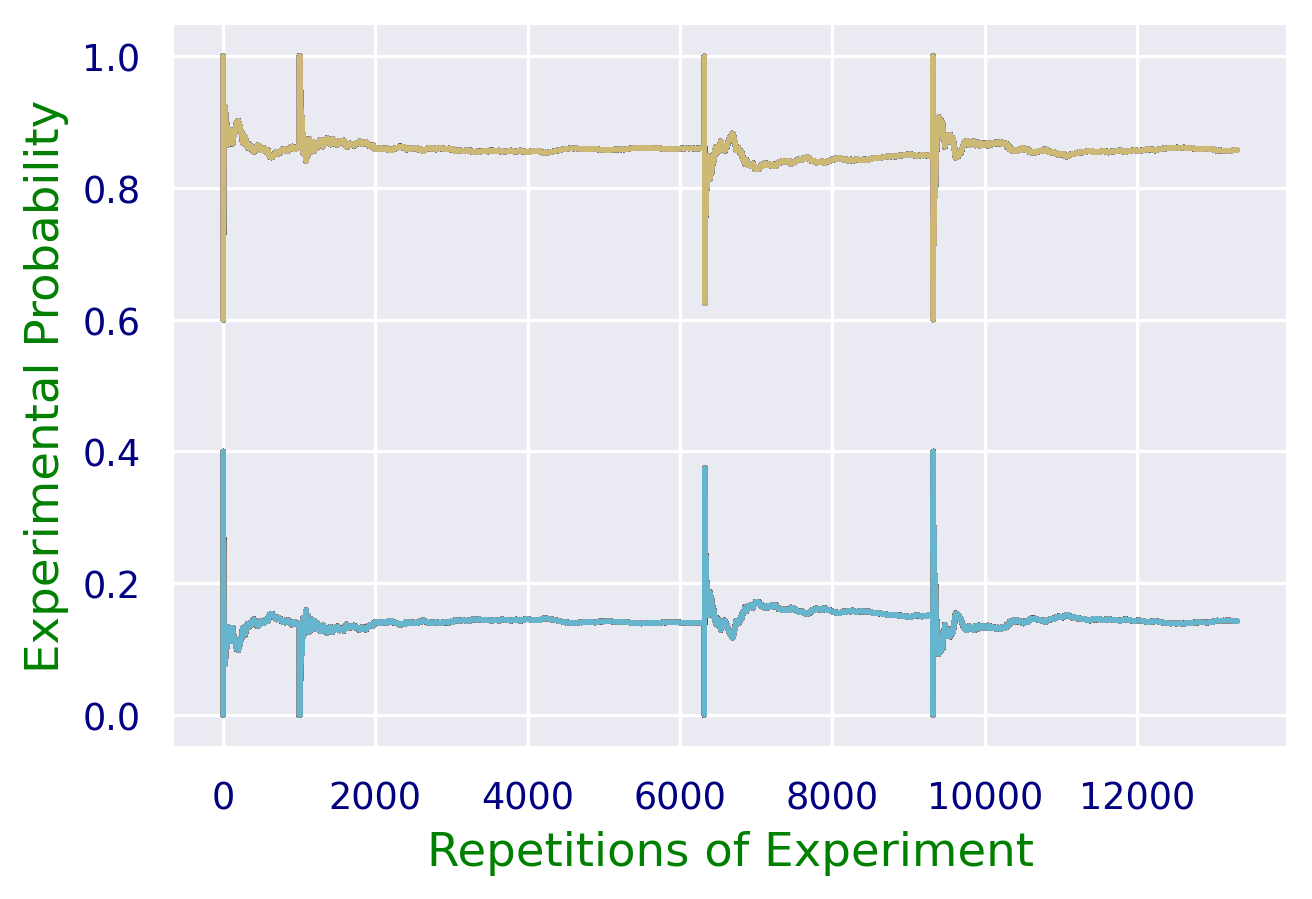

In [ ]:
monte_carlo(4000)

Question 2

Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

In [10]:
#Make dictionary here
dictionary = {'nyatl':866, 'nynash':900,'nashstl':309, 'nashno':532, 'atlstl': 555, 'atlno':470, 'stldall':662, 'nodall':505} #distances between each city

stlouis_or_neworleans = ['StLouis','NewOrleans']#1/2 prob witch will block st.louis or neworleans
 
average_miles_atlanta = []#make empty list of miles 
average_miles_nashville = []#make empty list of miles


#creating our monte carlo function for Atlanta
def monte_carlo_atl(n):

  miles_atl_route = 0 #keeping track of miles

  for i in range(n): 
    miles_atl_route += 866 #adding our NY to Atlanta distance
    choice = np.random.choice(stlouis_or_neworleans) #wicked witch blocks st.louis or neworleans

    if choice=='StLouis': #if witch chooses St.Louis
      miles_atl_route += dictionary['atlno'] #atlanta to new orleans 
      miles_atl_route += dictionary['nodall'] #new orleans to dallas 
    else: #if witch chooses neworleans
      miles_atl_route += dictionary['atlstl'] #atlanta to st.louis
      miles_atl_route += dictionary['stldall'] #st.louis to dallas 

    average_miles_atlanta.append(miles_atl_route/(i+1)) #total miles on atlanta route divided by iterations to get the average miles 
  
  print('Average distance from Atlanta:', average_miles_atlanta[-1])#subtracting the last value
  
#creating our monte carlo function for Nashville
def monte_carlo_nash(n):

  miles_nash_route = 0

  for i in range(n):
    miles_nash_route += 900
    choice = np.random.choice(stlouis_or_neworleans)

    if choice=='StLouis':
      miles_nash_route += dictionary['nashno']
      miles_nash_route += dictionary['nodall']
    else:
      miles_nash_route += dictionary['nashstl']
      miles_nash_route += dictionary['stldall']

    average_miles_nashville.append(miles_nash_route/(i+1))
  print('Average distance from Nashville:', average_miles_nashville[-1])

In [50]:
monte_carlo_atl(4000)

Average distance from Atlanta: 1963.452


In [14]:
monte_carlo_nash(4000) #max should travel to nashville because it is the shorter route

Average distance from Nashville: 1904.3795


Problem 3

Simulate a population of 20000 individuals from a beta distribution that has the parametrization a=1.6 and b=2.1. Select 400 simple random samples of size 32 from this population and show that the sample means are normally distributed by using histograms, distributional plots, Quantile-Quantile plots and normality tests.


In [40]:
data_beta = beta.rvs(a=1.6,b=2.1,size=20000)
n = 32 
means = [np.mean(np.random.choice(data_beta,n,replace=True,p=None)) for _i in range(400)]

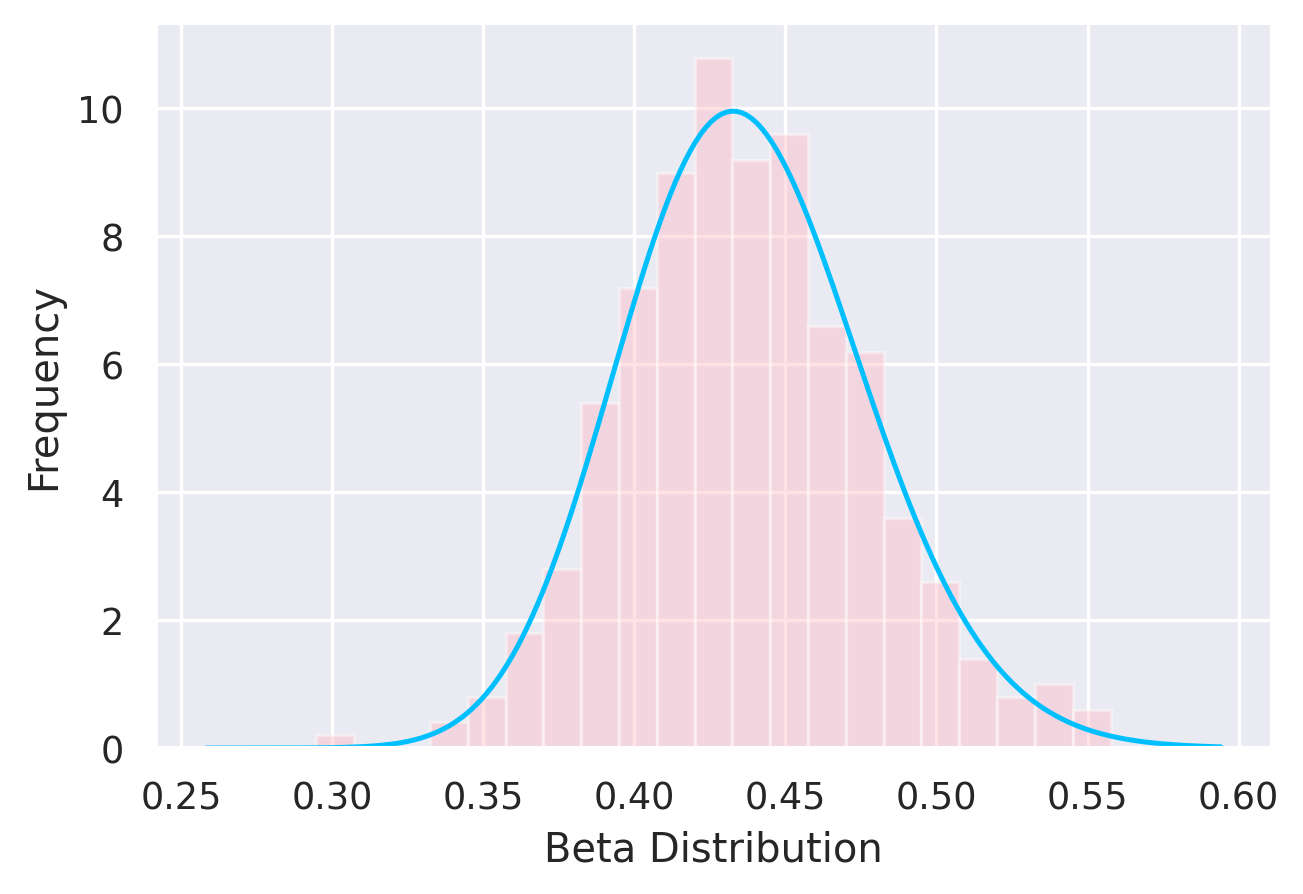

In [41]:
#distributional plot
ax = sns.distplot(means,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.beta,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Beta Distribution', ylabel='Frequency')
plt.show()

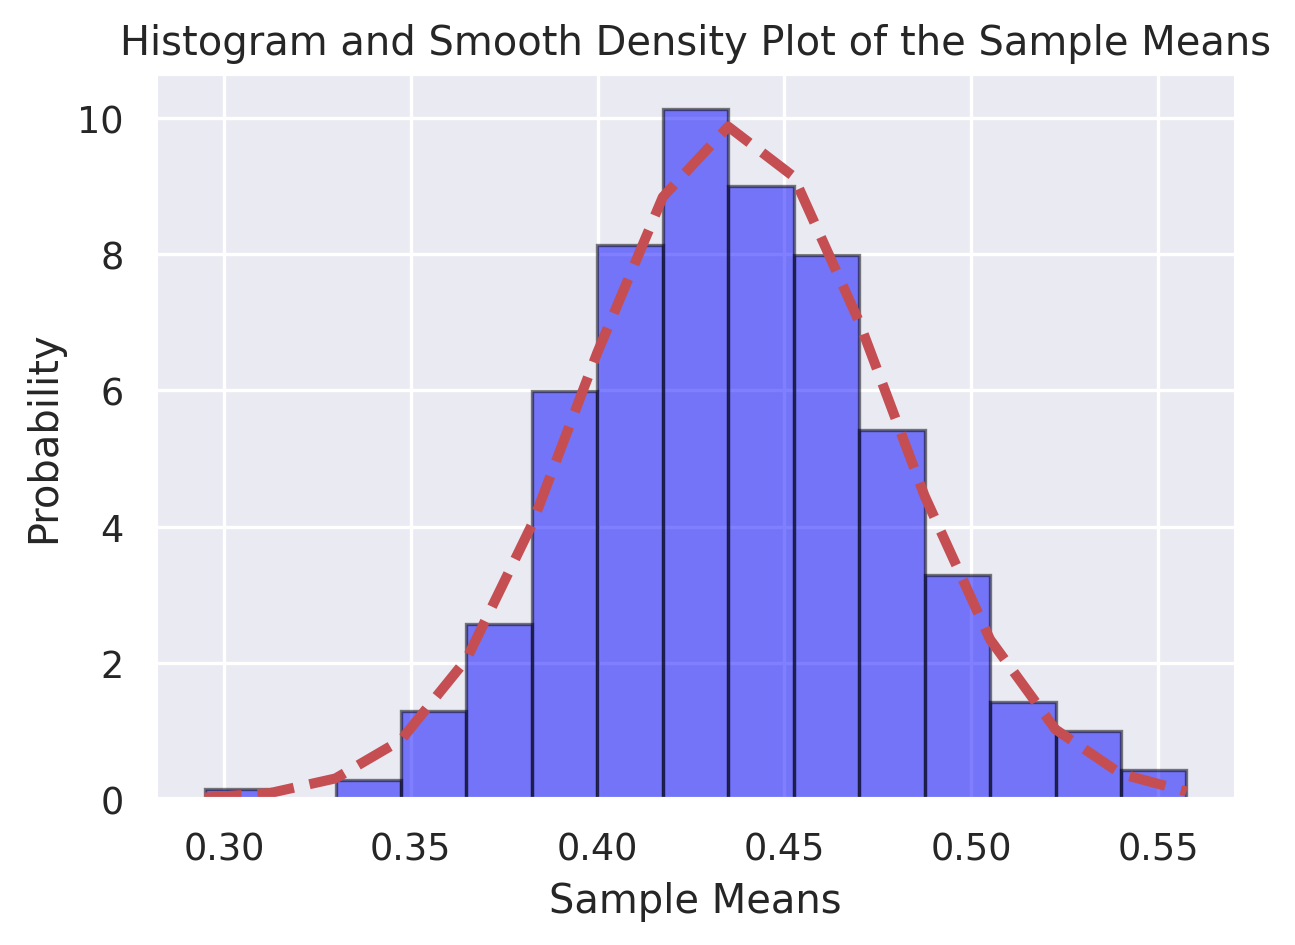

In [42]:
#histogram
mu = np.mean(data_beta)
sigma = np.std(data_beta)/np.sqrt(n)
num_bins = 15
n, bins, patches = plt.hist(means, num_bins, density=1, edgecolor='black',facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--',lw=3)
plt.xlabel('Sample Means')
plt.ylabel('Probability')
plt.title(r'Histogram and Smooth Density Plot of the Sample Means')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

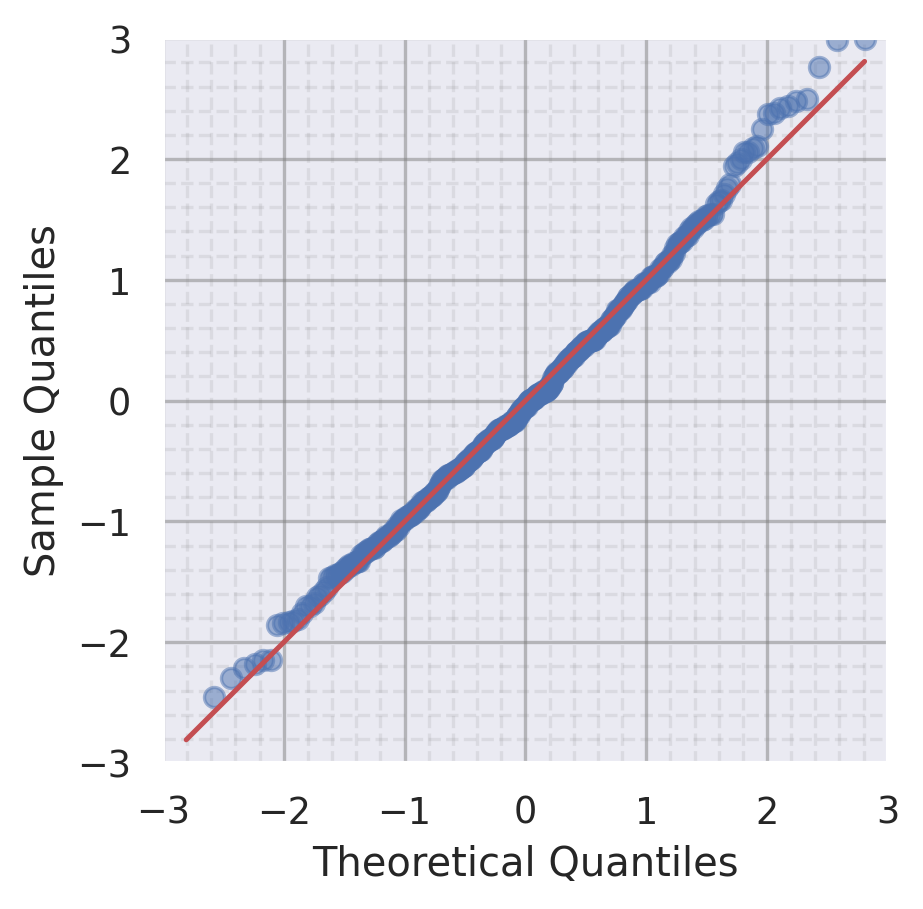

In [43]:
#QQ plot
sm.qqplot((means-np.mean(means))/np.std(means),line='s',alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [44]:
array_means = np.array(means)

In [45]:
#standardize data 
ss = SS()
smeans = ss.fit_transform(array_means.reshape(-1,1))

In [46]:
#Kolmogorov-Smirnov Test
stats.kstest(smeans.T[0],'norm')

KstestResult(statistic=0.03822594342401564, pvalue=0.5891565745330237)

In [47]:
#Anderson-Darling Test
stats.anderson(smeans.T[0],'norm')

AndersonResult(statistic=0.49941386761850026, critical_values=array([0.570000, 0.650000, 0.779000, 0.909000, 1.081000]), significance_level=array([15.000000, 10.000000, 5.000000, 2.500000, 1.000000]))